In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = [train,test]

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

# Separating dependent variable

In [7]:
train_y = train['SalePrice']
train.drop('SalePrice',axis=1,inplace=True)

In [8]:
train.replace(["None","none","-","NONE"],np.nan,inplace=True)

# REMOVING DATA WITH HIGH NAN VALUES

In [9]:
def removeNullFeatures(lst):
    num = lst.isnull().sum()
    percent = (num/len(lst))*100
    if(percent>90):
        return True
    return False

In [10]:
for i in train.columns:
    if(removeNullFeatures(train[i])):
        train.drop(i,axis=1,inplace=True)

# SPLITTING NUMERICAL AND CATEGORICAL COLUMNS

In [11]:
numerical_columns = train.select_dtypes(['float','int']).columns
categorical_columns = train.select_dtypes('object').columns

In [12]:
print(numerical_columns.shape)
print(categorical_columns.shape)

(37,)
(40,)


In [13]:
for i in numerical_columns:
    if(train[i].hasnans):
        print(i+"\t"+str(train[i].isnull().sum()))

LotFrontage	259
MasVnrArea	8
GarageYrBlt	81


In [14]:
def mean_imputation_numerical(df):
    df = df.fillna(df.mean())
    return df

In [15]:
target_columns = []
for i in numerical_columns:
    if(train[i].hasnans):
        target_columns.append(i)
train_numerical = train[numerical_columns]
x = train_numerical.drop(target_columns,axis=1)

In [16]:
def find_missing_index(train_numerical,target_columns):
    temp = train_numerical[target_columns][train_numerical[target_columns].isnull()].index
    return temp

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
def numerical_regressor(y,missing_index):
    y = y.fillna(y.mean())
    model = GradientBoostingRegressor()
    model.fit(x,y)
    prediction = model.predict(x)
    prediction = pd.Series(prediction,index = y.index)
    y.loc[missing_index] = prediction.loc[missing_index]
    return y

In [19]:
for i in target_columns:
    percent = ((train_numerical[i].isnull().sum())/len(train_numerical[i]))*100
    if(percent<=10):
        train_numerical[i] = mean_imputation_numerical(train_numerical[i])
    else:
        missing_index = find_missing_index(train_numerical,i)
        train_numerical[i] = numerical_regressor(train_numerical[i],missing_index)

In [20]:
train_numerical.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [21]:
for i in categorical_columns:
    if(train[i].hasnans):
        print("{:20s} {:20s}".format(i,str(train[i].isnull().sum())))

MasVnrType           872                 
BsmtQual             37                  
BsmtCond             37                  
BsmtExposure         38                  
BsmtFinType1         37                  
BsmtFinType2         38                  
Electrical           1                   
FireplaceQu          690                 
GarageType           81                  
GarageFinish         81                  
GarageQual           81                  
GarageCond           81                  
Fence                1179                


In [22]:
def mode_imputation_categorical(lst):
    mode = lst.mode().iloc[0]
    df = lst.fillna(mode)
    return df

In [23]:
train_categorical = train[categorical_columns]

In [24]:
categorical_target = []
for i in train_categorical.columns:
    if(train[i].hasnans):
        categorical_target.append(i)
categorical_target

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [25]:
for i in categorical_target:
    percent = ((train_categorical[i].isnull().sum())/len(train_categorical[i]))*100
    if(percent<=10):
        train_categorical[i] = mode_imputation_categorical(train_categorical[i])
    else:
        train_categorical[i].fillna('null',inplace=True)

In [26]:
train_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

In [27]:
for i in train_numerical.columns:
    print("{:20s} {:10s}".format(i,str(len(train_numerical[i].unique()))))

Id                   1460      
MSSubClass           15        
LotFrontage          368       
LotArea              1073      
OverallQual          10        
OverallCond          9         
YearBuilt            112       
YearRemodAdd         61        
MasVnrArea           328       
BsmtFinSF1           637       
BsmtFinSF2           144       
BsmtUnfSF            780       
TotalBsmtSF          721       
1stFlrSF             753       
2ndFlrSF             417       
LowQualFinSF         24        
GrLivArea            861       
BsmtFullBath         4         
BsmtHalfBath         3         
FullBath             4         
HalfBath             3         
BedroomAbvGr         8         
KitchenAbvGr         4         
TotRmsAbvGrd         12        
Fireplaces           4         
GarageYrBlt          98        
GarageCars           5         
GarageArea           441       
WoodDeckSF           274       
OpenPorchSF          202       
EnclosedPorch        120       
3SsnPorc

In [28]:
for i in train_categorical.columns:
    print("{:20s} {:10s}".format(i,str(len(train_categorical[i].unique()))))

MSZoning             5         
Street               2         
LotShape             4         
LandContour          4         
Utilities            2         
LotConfig            5         
LandSlope            3         
Neighborhood         25        
Condition1           9         
Condition2           8         
BldgType             5         
HouseStyle           8         
RoofStyle            6         
RoofMatl             8         
Exterior1st          15        
Exterior2nd          16        
MasVnrType           4         
ExterQual            4         
ExterCond            5         
Foundation           6         
BsmtQual             4         
BsmtCond             4         
BsmtExposure         4         
BsmtFinType1         6         
BsmtFinType2         6         
Heating              6         
HeatingQC            5         
CentralAir           2         
Electrical           5         
KitchenQual          4         
Functional           7         
Fireplac

In [29]:
train_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,null,Attchd,RFn,TA,TA,Y,null,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,null,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,null,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,null,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,null,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,null,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,null,WD,Normal


In [30]:
encoder_dictionary ={}
for i in train_categorical.columns:
    encoder_dictionary[i] = (train_categorical[i].value_counts()/len(train_categorical)).to_dict()

encoder_dictionary

{'MSZoning': {'RL': 0.7883561643835616,
  'RM': 0.14931506849315068,
  'FV': 0.04452054794520548,
  'RH': 0.010958904109589041,
  'C (all)': 0.00684931506849315},
 'Street': {'Pave': 0.9958904109589041, 'Grvl': 0.00410958904109589},
 'LotShape': {'Reg': 0.6335616438356164,
  'IR1': 0.3315068493150685,
  'IR2': 0.028082191780821917,
  'IR3': 0.00684931506849315},
 'LandContour': {'Lvl': 0.897945205479452,
  'Bnk': 0.04315068493150685,
  'HLS': 0.03424657534246575,
  'Low': 0.024657534246575342},
 'Utilities': {'AllPub': 0.9993150684931507, 'NoSeWa': 0.0006849315068493151},
 'LotConfig': {'Inside': 0.7205479452054795,
  'Corner': 0.18013698630136987,
  'CulDSac': 0.06438356164383562,
  'FR2': 0.03219178082191781,
  'FR3': 0.0027397260273972603},
 'LandSlope': {'Gtl': 0.9465753424657535,
  'Mod': 0.04452054794520548,
  'Sev': 0.008904109589041096},
 'Neighborhood': {'NAmes': 0.1541095890410959,
  'CollgCr': 0.10273972602739725,
  'OldTown': 0.0773972602739726,
  'Edwards': 0.0684931506849

In [31]:
for i in train_categorical.columns:
    train_categorical[i] = train_categorical[i].map(encoder_dictionary[i])

In [32]:
train_categorical.dtypes

MSZoning         float64
Street           float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
RoofStyle        float64
RoofMatl         float64
Exterior1st      float64
Exterior2nd      float64
MasVnrType       float64
ExterQual        float64
ExterCond        float64
Foundation       float64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinType2     float64
Heating          float64
HeatingQC        float64
CentralAir       float64
Electrical       float64
KitchenQual      float64
Functional       float64
FireplaceQu      float64
GarageType       float64
GarageFinish     float64
GarageQual       float64
GarageCond       float64
PavedDrive       float64
Fence            float64
SaleType         float64
SaleCondition    float64


In [33]:
train_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,0.788356,0.99589,0.633562,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.678767,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.472603,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
1,0.788356,0.99589,0.633562,0.897945,0.999315,0.032192,0.946575,0.007534,0.055479,0.989726,0.835616,0.497260,0.781507,0.982192,0.150685,0.146575,0.597260,0.620548,0.878082,0.434247,0.423288,0.923288,0.091781,0.150685,0.886301,0.978082,0.507534,0.934932,0.914384,0.503425,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
2,0.788356,0.99589,0.331507,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.078082,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
3,0.788356,0.99589,0.331507,0.897945,0.999315,0.180137,0.946575,0.034932,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.141096,0.026027,0.597260,0.620548,0.878082,0.100000,0.469863,0.044521,0.678767,0.150685,0.886301,0.978082,0.165068,0.934932,0.914384,0.401370,0.931507,0.260274,0.265068,0.469863,0.953425,0.963699,0.917808,0.807534,0.867808,0.069178
4,0.788356,0.99589,0.331507,0.897945,0.999315,0.032192,0.946575,0.028082,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.151370,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548


In [34]:
df = pd.concat([train_numerical,train_categorical],axis=1)

In [35]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0.788356,0.99589,0.633562,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.678767,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.472603,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0.788356,0.99589,0.633562,0.897945,0.999315,0.032192,0.946575,0.007534,0.055479,0.989726,0.835616,0.497260,0.781507,0.982192,0.150685,0.146575,0.597260,0.620548,0.878082,0.434247,0.423288,0.923288,0.091781,0.150685,0.886301,0.978082,0.507534,0.934932,0.914384,0.503425,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0.788356,0.99589,0.331507,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.078082,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0.788356,0.99589,0.331507,0.897945,0.999315,0.180137,0.946575,0.034932,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.141096,0.026027,0.597260,0.620548,0.878082,0.100000,0.469863,0.044521,0.678767,0.150685,0.886301,0.978082,0.165068,0.934932,0.914384,0.401370,0.931507,0.260274,0.265068,0.469863,0.953425,0.963699,0.917808,0.807534,0.867808,0.069178
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0.788356,0.99589,0.331507,0.897945,0.999315,0.032192,0.946575,0.028082,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.151370,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548


In [36]:
df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd 

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [38]:
for i in df.columns:
    print("{:20s} {:10s}".format(i,str(len(df[i].unique()))))

Id                   1460      
MSSubClass           15        
LotFrontage          368       
LotArea              1073      
OverallQual          10        
OverallCond          9         
YearBuilt            112       
YearRemodAdd         61        
MasVnrArea           328       
BsmtFinSF1           637       
BsmtFinSF2           144       
BsmtUnfSF            780       
TotalBsmtSF          721       
1stFlrSF             753       
2ndFlrSF             417       
LowQualFinSF         24        
GrLivArea            861       
BsmtFullBath         4         
BsmtHalfBath         3         
FullBath             4         
HalfBath             3         
BedroomAbvGr         8         
KitchenAbvGr         4         
TotRmsAbvGrd         12        
Fireplaces           4         
GarageYrBlt          98        
GarageCars           5         
GarageArea           441       
WoodDeckSF           274       
OpenPorchSF          202       
EnclosedPorch        120       
3SsnPorc

In [39]:
df.drop('Id',axis=1,inplace=True)

In [40]:
pd.concat([df,train_y],axis=1).to_csv("final_data.csv")

In [41]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0.788356,0.99589,0.633562,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.678767,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.472603,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0.788356,0.99589,0.633562,0.897945,0.999315,0.032192,0.946575,0.007534,0.055479,0.989726,0.835616,0.497260,0.781507,0.982192,0.150685,0.146575,0.597260,0.620548,0.878082,0.434247,0.423288,0.923288,0.091781,0.150685,0.886301,0.978082,0.507534,0.934932,0.914384,0.503425,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0.788356,0.99589,0.331507,0.897945,0.999315,0.720548,0.946575,0.102740,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.078082,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0.788356,0.99589,0.331507,0.897945,0.999315,0.180137,0.946575,0.034932,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.141096,0.026027,0.597260,0.620548,0.878082,0.100000,0.469863,0.044521,0.678767,0.150685,0.886301,0.978082,0.165068,0.934932,0.914384,0.401370,0.931507,0.260274,0.265068,0.469863,0.953425,0.963699,0.917808,0.807534,0.867808,0.069178
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0.788356,0.99589,0.331507,0.897945,0.999315,0.032192,0.946575,0.028082,0.863014,0.989726,0.835616,0.304795,0.781507,0.982192,0.352740,0.345205,0.304795,0.334247,0.878082,0.443151,0.423288,0.923288,0.151370,0.286301,0.886301,0.978082,0.507534,0.934932,0.914384,0.401370,0.931507,0.214384,0.651370,0.289041,0.953425,0.963699,0.917808,0.807534,0.867808,0.820548


In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
bestFeatures = SelectKBest(score_func=chi2)
fit = bestFeatures.fit(df,train_y)

In [44]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df.columns)

In [45]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [46]:
featureScores.sort_values(by='Score',ascending=False)

,Specs,Score
2,LotArea,1.011497e+07
33,MiscVal,6.253332e+06
13,2ndFlrSF,4.648841e+05
8,BsmtFinSF1,3.999851e+05
32,PoolArea,3.835642e+05
9,BsmtFinSF2,3.688827e+05
7,MasVnrArea,2.857403e+05
10,BsmtUnfSF,2.747512e+05
14,LowQualFinSF,2.448810e+05
15,GrLivArea,1.968501e+05


In [48]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [49]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(df, train_y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [50]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [51]:
selected_feat = df.columns[(feature_sel_model.get_support())]

In [52]:
X_train=df[selected_feat]

# TRAIN TEST SPLIT

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df, train_y, test_size=0.30, random_state=101)

# MODEL BUILDING

# LINEAR REGRESSION

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_prediction = lr_model.predict(X_test)

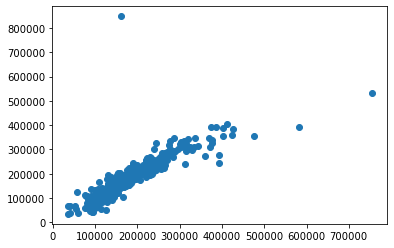

In [57]:
plt.scatter(y_test,lr_prediction)

In [58]:
from sklearn import metrics

In [59]:
error_lr  = metrics.mean_absolute_error(y_test,lr_prediction)
error_lr

20476.359554617473

CHECKING WITH TRAINING DATA

In [60]:
temp = lr_model.predict(X_train)

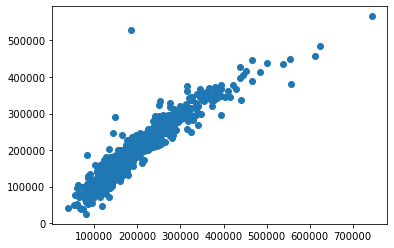

In [61]:
plt.scatter(y_train,temp)

In [62]:
metrics.mean_absolute_error(y_train,temp)

17541.01425324675

# KNN ALGO

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)
knn_prediction = knn_model.predict(X_test)

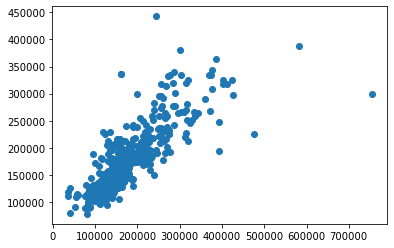

In [65]:
plt.scatter(y_test,knn_prediction)

In [66]:
error_knn = metrics.mean_absolute_error(y_test,knn_prediction)
error_knn

30073.83652968036

In [67]:
error = []

for i in range(1,40):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    train_prediction_knn = knn_model.predict(X_test)
    error.append(metrics.mean_absolute_error(y_test,train_prediction_knn))

Text(0, 0.5, 'Error Rate')

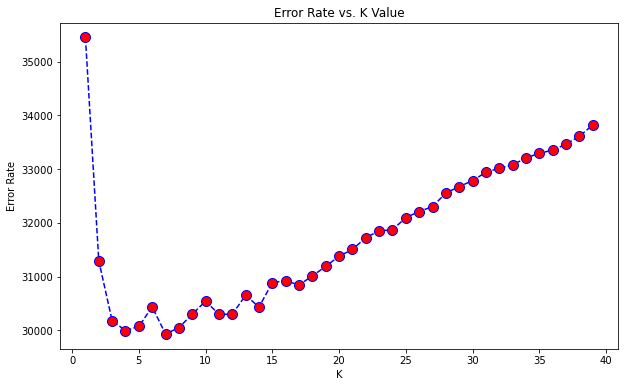

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(X_train,y_train)
knn_prediction = knn_model.predict(X_test)

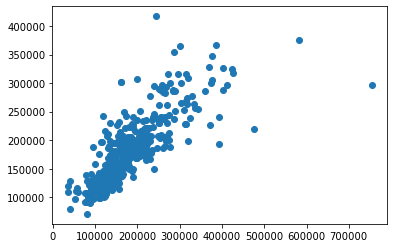

In [70]:
plt.scatter(y_test,knn_prediction)

In [71]:
error_knn = metrics.mean_absolute_error(y_test,knn_prediction)
error_knn

29933.64350945858

# DECISION TREE

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_prediction = dt_model.predict(X_test)

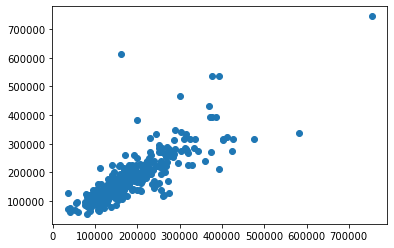

In [74]:
plt.scatter(y_test,dt_prediction)

In [75]:
error_dt = metrics.mean_absolute_error(y_test,dt_prediction)
error_dt

27107.940639269407

# RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_prediction = rf_model.predict(X_test)

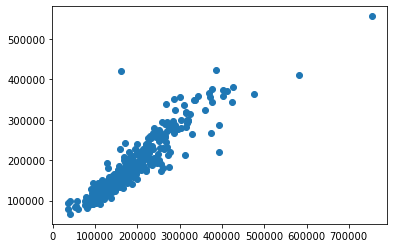

In [78]:
plt.scatter(y_test,rf_prediction)

In [79]:
error_rf = metrics.mean_absolute_error(y_test,rf_prediction)
error_rf

18248.79210045662

# GRADIENT BOOSTING

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)
gb_prediction = gb_model.predict(X_test)

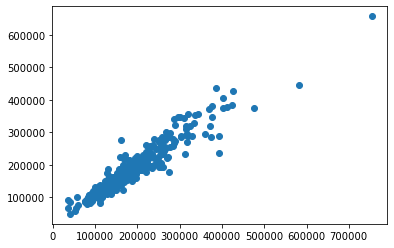

In [82]:
plt.scatter(y_test,gb_prediction)

In [83]:
error_gb = metrics.mean_absolute_error(y_test,gb_prediction)
error_gb

16352.5633358849

# XGBOOST

In [84]:
from xgboost import XGBRegressor

In [85]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_prediction = xgb_model.predict(X_test)

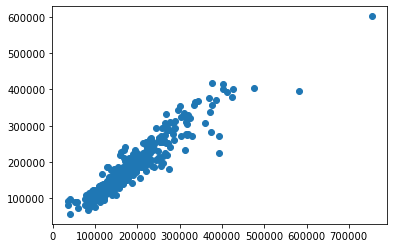

In [86]:
plt.scatter(y_test,xgb_prediction)

In [87]:
error_xg = metrics.mean_absolute_error(y_test,xgb_prediction)
error_xg

17764.534433861303

In [88]:
value = pd.DataFrame({
    'MODEL': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest','Gradient Boosting','XGBoost'],
    'ERROR':[error_lr,error_knn,error_dt,error_rf,error_gb,error_xg]
})

In [89]:
value.sort_values(by='ERROR')

,MODEL,ERROR
4,Gradient Boosting,16352.563336
5,XGBoost,17764.534434
3,Random Forest,18248.792100
0,Linear Regression,20476.359555
2,Decision Tree,27107.940639
1,KNN,29933.643509
